Cloning the repository to personal drive (requires authentication)

In [ ]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
import cv2
from google.colab import drive

In [33]:
drive.mount('/content/drive')
path_clone = "drive/My Drive/projects"
!cd path_clone

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: line 0: cd: path_clone: No such file or directory


In [34]:
# Clone the entire repo.
!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 134 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (134/134), 23.61 MiB | 8.96 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/cloned-repo
msf_data  web_data


In [40]:
ls web_data

aviat_google  boeing_google


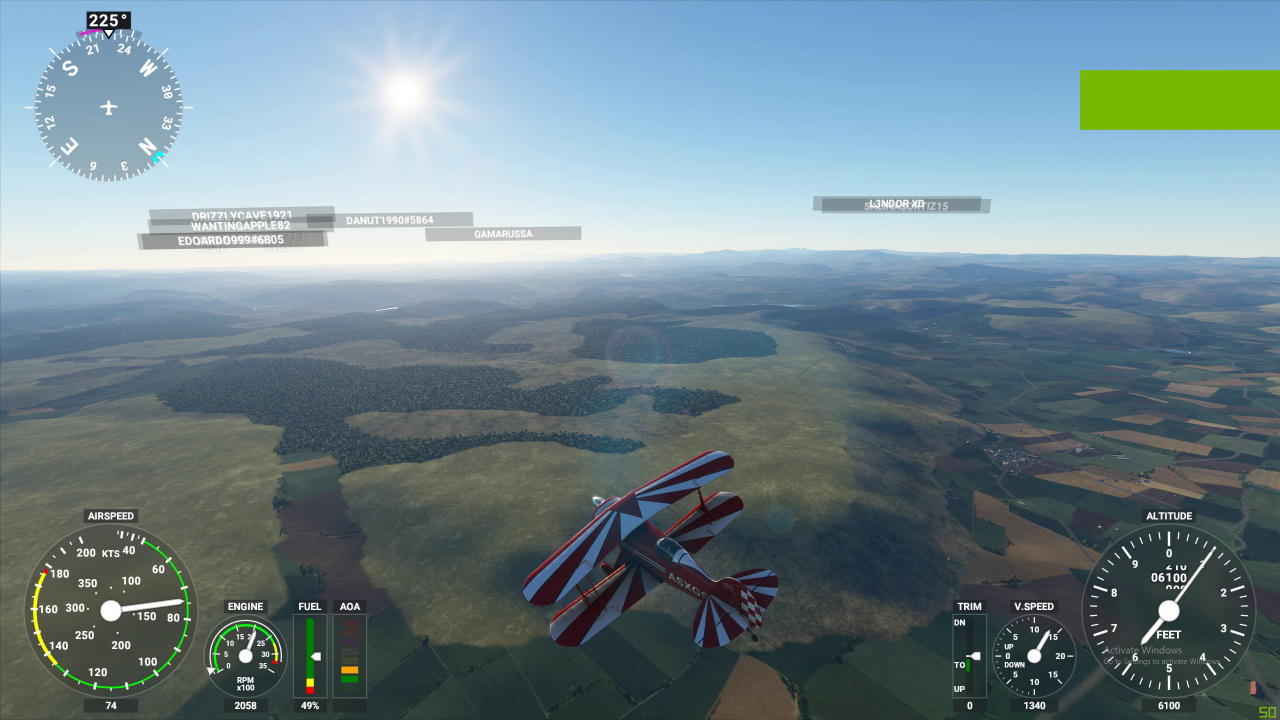

In [38]:
open_image("msf_data/aviat/kang0.jpg")

## Download images
Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

Github only has links at the moment.

In [50]:
path = Path('web_data')
folder = "aviat_downloaded"
dest = path/folder
download_images('web_data/aviat_google', dest, max_pics=400)

In [51]:
path = Path('web_data')
folder = "boeing_downloaded"
dest = path/folder
download_images('web_data/boeing_google', dest, max_pics=400)

In [52]:
classes = ['aviat','boeing']

Then we can remove any images that can't be opened:

In [53]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

aviat
boeing


## View data

In [54]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [55]:
data.classes

['aviat_downloaded', 'boeing_downloaded']

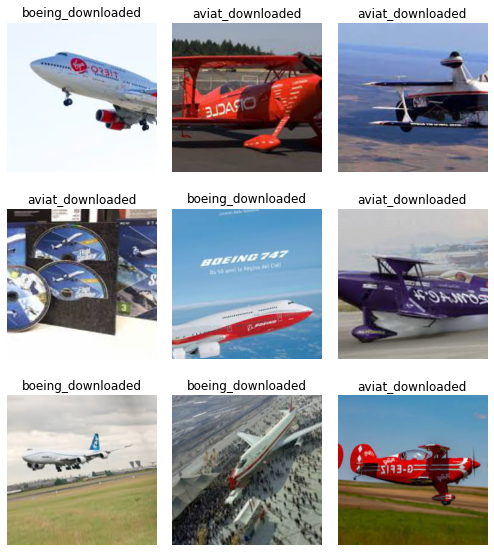

In [56]:
data.show_batch(rows=3, figsize=(7,8))

In [57]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['aviat_downloaded', 'boeing_downloaded'], 2, 628, 156)

## Train model

3 Epochs 

In [58]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Run for 10 minutes:

In [59]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.806513,0.216030,0.903846,03:28
1,0.551641,0.138693,0.935897,03:30
2,0.445748,0.112087,0.955128,03:27


In [60]:
interp = ClassificationInterpretation.from_learner(learn)

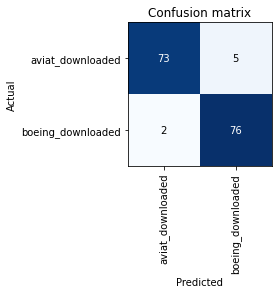

In [61]:
interp.plot_confusion_matrix()

In [80]:
#aviat_list = !msf_data/aviat/
aviat_list = Path("msf_data/aviat/").ls()

tulemused = []
for i in aviat_list):
  img = open_image(i)
  pred_class,pred_idx,outputs = learn.predict(img)
  vastus = data.classes[int(pred_class)]
  tulemused = np.append(tulemused, vastus)



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

0.0
['aviat_downloaded' 'boeing_downloaded' 'boeing_downloaded' 'aviat_downloaded' ... 'aviat_downloaded'
 'aviat_downloaded' 'aviat_downloaded' 'aviat_downloaded']


In [83]:
print("Accuracy: ", len(tulemused[tulemused == "aviat_downloaded"])/len(tulemused))


Accuracy: +  0.91
